# Seattle House Data

## Import and Describe the Data

We start by listing all of the packages needed for this tutorial. To show where they are required, we include them as comments.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
import random

from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler, MinMaxScaler


Read in and check the data.

In [1]:
#import pandas as pd
HouseData = pd.read_csv("https://raw.githubusercontent.com/OpenActTextDev/ActuarialRegression/refs/heads/main/CSVData/kc_house_data.csv")
HouseData.head() # check the data

NameError: name 'pd' is not defined

Let us look at the target (dependent) variable.

In [2]:
# Define target, sales in thousands
y = HouseData['price']/1000

# Plot histogram
#import matplotlib.pyplot as plt
plt.hist(y, bins=30, edgecolor="black")
plt.xlabel("House Prices")
plt.ylabel("Frequency")
plt.title("Histogram of House Prices")
plt.show()
print(y.describe())



NameError: name 'HouseData' is not defined

Now, for the features (covariates).

In [ ]:
# Define features (drop target + non-predictors like id, date)
X = HouseData.drop(columns=['price', 'id', 'date'])
print(X.describe())


           bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  21613.000000  21613.000000  21613.000000  2.161300e+04  21613.000000   
mean       3.370842      2.114757   2079.899736  1.510697e+04      1.494309   
std        0.930062      0.770163    918.440897  4.142051e+04      0.539989   
min        0.000000      0.000000    290.000000  5.200000e+02      1.000000   
25%        3.000000      1.750000   1427.000000  5.040000e+03      1.000000   
50%        3.000000      2.250000   1910.000000  7.618000e+03      1.500000   
75%        4.000000      2.500000   2550.000000  1.068800e+04      2.000000   
max       33.000000      8.000000  13540.000000  1.651359e+06      3.500000   

         waterfront          view     condition         grade    sqft_above  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       0.007542      0.234303      3.409430      7.656873   1788.390691   
std        0.086517      0.766318      0.650743    

We might be interested in geo-spatial features of the data.

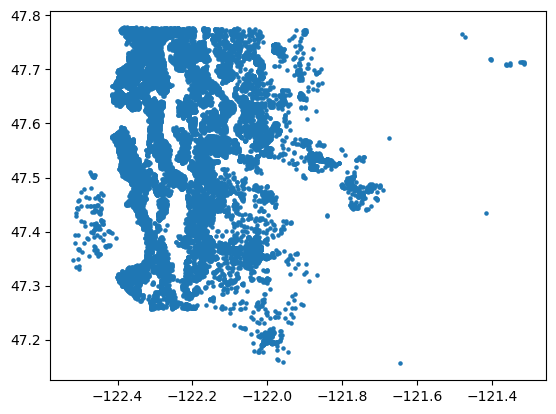

In [ ]:
plt.scatter(X["long"], X["lat"], s=5);

Here is how one can split the data into training, validation, and testing sub-samples.

In [ ]:
#from sklearn.model_selection import train_test_split
# Thanks https://datascience.stackexchange.com/a/15136
X_main, X_test, y_main, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# As 0.25 x 0.8 = 0.2
X_train, X_val, y_train, y_val = train_test_split(
    X_main, y_main, test_size=0.25, random_state=1
)


For presentation purposes, we use the simpler training and testing splits.

In [3]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

NameError: name 'train_test_split' is not defined

# Regression Models

In [ ]:
#from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
# Create summary table
summary_df = pd.DataFrame({
    "Feature": ["Intercept"] + list(X.columns),
    "Coefficient": [model.intercept_] + list(model.coef_)
})

print(summary_df)

          Feature  Coefficient
0       Intercept  6690.324603
1        bedrooms   -35.766541
2       bathrooms    41.144279
3     sqft_living     0.110443
4        sqft_lot     0.000129
5          floors     6.689550
6      waterfront   582.960458
7            view    52.870942
8       condition    26.385649
9           grade    95.890445
10     sqft_above     0.070785
11  sqft_basement     0.039658
12       yr_built    -2.620223
13   yr_renovated     0.019813
14        zipcode    -0.582420
15            lat   602.748226
16           long  -214.729828
17  sqft_living15     0.021681
18     sqft_lot15    -0.000383


For consistency with other analyses, let us drop a few of the variables and show another way to fit the regression model.

In [ ]:
#  A shorter version of the features matrix
XTrainShort = X_train.drop(columns=['zipcode','lat', 'long', 'sqft_living15',
                               'sqft_lot15', 'sqft_basement','view', 'condition','grade'])
XTrainShortInt = sm.add_constant(XTrainShort)  # adds intercept term

#import statsmodels.api as sm
#from sklearn.metrics import r2_score
model = sm.OLS(y_train, XTrainShortInt).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     2517.
Date:                Wed, 23 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:30:36   Log-Likelihood:            -1.1133e+05
No. Observations:               16209   AIC:                         2.227e+05
Df Residuals:                   16199   BIC:                         2.228e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6235.6063    159.012     39.215   

Another way to do the regression.

In [ ]:
lr = LinearRegression()
lr.fit(XTrainShortInt, y_train)
print(lr.coef_)

[ 0.00000000e+00 -6.02962627e+01  6.83540894e+01  2.76741207e-01
 -3.46251883e-04  4.64163644e+01  6.92124831e+02  1.68531128e-02
 -3.20304110e+00  1.31971195e-02]


Now, create a vectors of predictions; one for the training set, one for the test set. Then, compare the training set predictions to actual target outcomes.

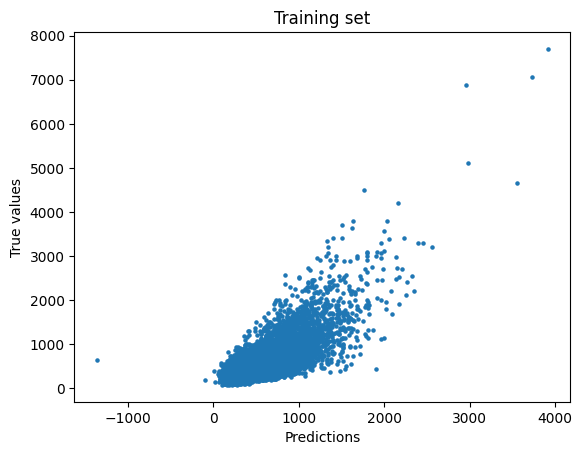

In [ ]:
ytrain_predict = lr.predict(XTrainShortInt)
XTestShort = X_test.drop(columns=['zipcode','lat', 'long', 'sqft_living15',
                               'sqft_lot15', 'sqft_basement','view', 'condition','grade'])
XTestShortInt = sm.add_constant(XTestShort)  # adds intercept term
ytest_predict = lr.predict(XTestShortInt)

plt.scatter(ytrain_predict, y_train, s=5)
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Training set");


Compare the test set predictions to actual target outcomes.

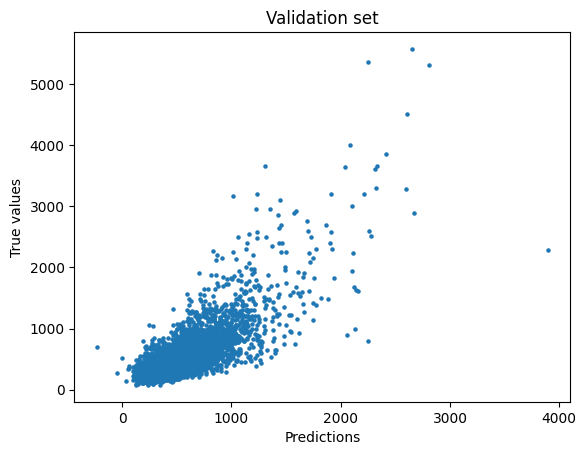

In [ ]:
plt.scatter(ytest_predict, y_test, s=5)
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Validation set");

Now let us compare predictions to actuals for both the training and test sets. Take the square root of the mse (mean squared error) so the units are in dollars (not squared dollars).

In [ ]:
#from sklearn.metrics import mean_squared_error as mse
print(np.sqrt(mse(ytrain_predict, y_train)))
print(np.sqrt(mse(ytest_predict, y_test)))


232.65580118752024
246.84386800716536


As anticipated, the fit is better for the training than the test set.

#  Neural Nets

We can start by specifying the model and taking a look at a summary of it.

In [ ]:
#from keras.models import Sequential
#from keras.layers import Dense, Input

model = Sequential(
    [Input((9,)),
     Dense(30, activation="leaky_relu"),
     Dense(1, activation="leaky_relu")]
)
model.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ (None, 30)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331 (1.29 KB)

 Trainable params: 331 (1.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# import random
random.seed(2025)
model = Sequential(
    [Dense(30, activation="leaky_relu"),
     Dense(1, activation="leaky_relu")]
);

In [ ]:

model.compile("adam", "mse")
%time hist = model.fit(XTrainShort, y_train, epochs=5, validation_data=(XTestShort, y_test), verbose=True)

Epoch 1/5
507/507 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 396990.9375 - val_loss: 93554.9531
Epoch 2/5
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 80332.4219 - val_loss: 80627.0469
Epoch 3/5
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 133987.0156 - val_loss: 250928.8125
Epoch 4/5
507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 77839.5312 - val_loss: 82412.5625
Epoch 5/5
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 68123.5703 - val_loss: 75021.3438
CPU times: user 9.52 s, sys: 804 ms, total: 10.3 s
Wall time: 11.4 s


In [ ]:
print(np.sqrt(hist.history["loss"]))

[408.60064167 285.86253799 321.83823819 268.29458506 261.28359533]


In [ ]:
model.compile("adam", "mse")
%time hist = model.fit(XTrainShort, y_train, epochs=150, validation_data=(XTestShort, y_test), verbose=False)
hist.history["loss"]

CPU times: user 3min 49s, sys: 17.2 s, total: 4min 6s
Wall time: 4min 33s


[75772.1640625,
 67149.25,
 73528.859375,
 105588.96875,
 68177.921875,
 71465.4296875,
 64352.6015625,
 77923.625,
 93084.90625,
 77971.640625,
 64534.34765625,
 65517.65625,
 62886.2578125,
 65043.3203125,
 79749.28125,
 60995.9296875,
 70979.3125,
 80343.015625,
 76913.1484375,
 64375.07421875,
 65157.52734375,
 89216.53125,
 73448.609375,
 59731.5390625,
 77293.96875,
 61436.21875,
 67478.3984375,
 73050.9140625,
 66202.4765625,
 61666.671875,
 59426.50390625,
 74590.5703125,
 62508.265625,
 92343.0390625,
 107774.53125,
 57904.578125,
 62197.6953125,
 63446.9609375,
 60612.12890625,
 63270.81640625,
 72314.1015625,
 62439.18359375,
 61995.5625,
 66922.984375,
 76310.484375,
 62710.06640625,
 65340.78125,
 64686.609375,
 69643.2421875,
 59935.34765625,
 86967.96875,
 63998.7734375,
 67906.15625,
 61204.7265625,
 63639.05859375,
 62876.2265625,
 73556.734375,
 61862.68359375,
 58277.07421875,
 60686.1484375,
 61384.52734375,
 72661.6875,
 59312.51171875,
 79223.5234375,
 58352.17578

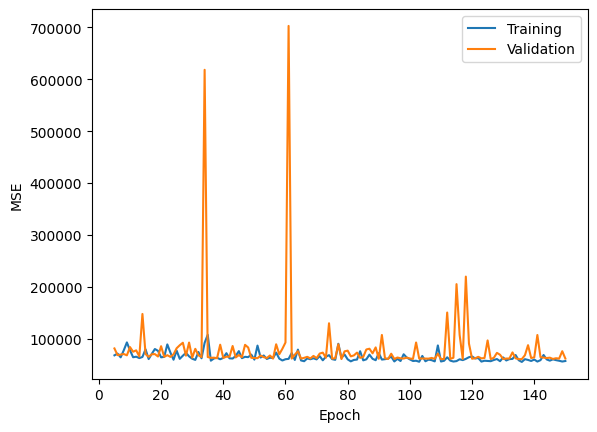

In [ ]:
plt.plot(range(5, 151), hist.history["loss"][4:])
plt.plot(range(5, 151), hist.history["val_loss"][4:])

plt.legend(["Training", "Validation"])
plt.xlabel("Epoch")
plt.ylabel("MSE");

In [ ]:
yNNtrain_predict= model.predict(XTrainShort, verbose=0)
print(pd.DataFrame(yNNtrain_predict) .describe())


                  0
count  16209.000000
mean     541.056274
std      287.264618
min     -163.955612
25%      380.030670
50%      466.415070
75%      602.243591
max     6483.996582


In [ ]:
#from sklearn.metrics import mean_squared_error as mse
print(np.sqrt(mse(yNNtrain_predict, y_train)))

232.2032052477783


In [ ]:
yNNtest_predict= model.predict(XTestShort, verbose=0)

print(pd.DataFrame(yNNtest_predict) .describe())
print(np.sqrt(mse(yNNtest_predict, y_test)))


                 0
count  5404.000000
mean    548.766724
std     305.796906
min    -217.668457
25%     379.470657
50%     467.086151
75%     610.742035
max    4218.446289
249.00958243694305


**Rescale the features**

In [ ]:
#from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(XTrainShort)

XTrainShort_sc = scaler.transform(XTrainShort)
XTestShort_sc  = scaler.transform(XTestShort)
print(pd.DataFrame(XTrainShort_sc) .describe())

                  0             1             2             3             4  \
count  1.620900e+04  1.620900e+04  1.620900e+04  1.620900e+04  1.620900e+04   
mean   1.876194e-16 -6.926137e-17  5.874065e-17  8.109717e-18 -1.806056e-16   
std    1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00   
min   -3.608735e+00 -2.761375e+00 -1.966164e+00 -3.695520e-01 -9.186256e-01   
25%   -3.941321e-01 -8.011497e-01 -7.092478e-01 -2.540579e-01 -9.186256e-01   
50%   -3.941321e-01  1.789627e-01 -1.800198e-01 -1.872187e-01  2.158665e-03   
75%    6.774021e-01  5.056668e-01  5.256175e-01 -1.091237e-01  9.229429e-01   
max    3.175190e+01  7.693158e+00  1.099992e+01  2.961857e+01  3.685296e+00   

                  5             6             7             8  
count  1.620900e+04  1.620900e+04  1.620900e+04  1.620900e+04  
mean  -4.734321e-17  1.393995e-16  3.186023e-15  3.506905e-18  
std    1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00  
min   -8.378769e-02 -1.818889e+0

In [ ]:
random.seed(2025)
model_sc = Sequential(
    [Dense(30, activation="leaky_relu"),
     Dense(1, activation="leaky_relu")]);


In [ ]:

model_sc.compile("adam", "mse")
%time hist_sc = model_sc.fit(XTrainShort_sc, y_train, epochs=150, validation_data=(XTestShort_sc, y_test), verbose=False)
hist_sc.history["loss"]

CPU times: user 3min 48s, sys: 17.4 s, total: 4min 5s
Wall time: 4min 23s


[410580.15625,
 365119.0,
 287079.875,
 205766.25,
 142256.4375,
 101586.46875,
 79552.9453125,
 69268.5859375,
 64479.83203125,
 61792.640625,
 59824.53125,
 58206.2265625,
 56889.359375,
 55802.5078125,
 54926.44921875,
 54268.953125,
 53726.98828125,
 53292.47265625,
 52890.84765625,
 52594.6953125,
 52296.69140625,
 52057.15234375,
 51810.88671875,
 51592.4765625,
 51410.328125,
 51217.625,
 51069.46484375,
 50912.70703125,
 50773.4453125,
 50662.890625,
 50555.58203125,
 50436.29296875,
 50343.2265625,
 50233.39453125,
 50157.11328125,
 50050.48828125,
 49961.30859375,
 49849.7578125,
 49777.9296875,
 49685.5390625,
 49609.9375,
 49531.76953125,
 49470.578125,
 49396.5703125,
 49336.74609375,
 49259.19921875,
 49212.28125,
 49154.98828125,
 49109.3359375,
 49049.24609375,
 48990.8125,
 48945.03515625,
 48902.65234375,
 48842.23828125,
 48809.41015625,
 48759.00390625,
 48726.45703125,
 48676.765625,
 48664.0078125,
 48589.13671875,
 48562.16015625,
 48526.83203125,
 48503.48046875

In [ ]:
print(np.sqrt(hist_sc.history["loss"]))

[640.76528952 604.25077575 535.79835293 453.61464923 377.16897738
 318.72632265 282.05131681 263.18925878 253.92879323 248.58125558
 244.59053794 241.25966626 238.51490388 236.22554437 234.36392474
 232.95697698 231.79082873 230.85162476 229.98010274 229.33533376
 228.68469867 228.16036541 227.62004903 227.13977318 226.73845753
 226.31311274 225.98554123 225.63844316 225.329637   225.08418564
 224.84568493 224.58025953 224.37296308 224.12807618 223.95783818
 223.71966449 223.52026439 223.27059326 223.10968085 222.90253265
 222.73288374 222.55733987 222.41982404 222.25339213 222.11876574
 221.94413536 221.83841248 221.70924266 221.60626331 221.47064386
 221.33868279 221.23524845 221.13944095 221.00280152 220.9285182
 220.81441055 220.74070089 220.62811613 220.59920175 220.42943705
 220.36823763 220.28806602 220.23505731 220.08840553 220.05262155
 219.91900142 219.82588103 219.75798123 219.69125175 219.58791306
 219.52651463 219.43509683 219.35168145 219.30999749 219.24973275
 219.180941

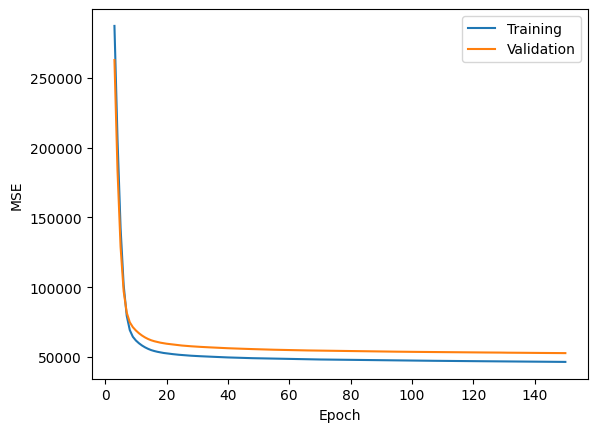

In [ ]:
plt.plot(range(3, 151), hist_sc.history["loss"][2:])
plt.plot(range(3, 151), hist_sc.history["val_loss"][2:])

plt.legend(["Training", "Validation"])
plt.xlabel("Epoch")
plt.ylabel("MSE");

In [ ]:
ysctrain_predict= model_sc.predict(XTrainShort_sc, verbose=0)
ysctest_predict = model_sc.predict(XTestShort_sc, verbose=0)

print(np.sqrt(mse(ysctrain_predict, y_train)))
print(np.sqrt(mse(ysctest_predict, y_test)))

215.41584605392526
229.73231946556055
